In [1]:
import nltk
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [2]:
def sent_accuracy(preds, labels):
    accuracies = []
    for i in range(len(preds)):
        actual = labels[i]
        acc = 0
        for j in range(len(preds[i])):
            if preds[i][j] == actual[j]:
                acc += 1
        if len(preds[i]) > 0:
            acc = acc / len(preds[i])
        accuracies.append(acc)
    return accuracies

In [3]:
TAGS = ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ',
        'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']

In [4]:
garden_sent = []
with open('data/data_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        garden_sent.append(tokens)

normal_sent = []
with open('data/data_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        normal_sent.append(tokens)

In [5]:
# Random predictor
pred_garden = [[random.choice(TAGS) for x in sent] for sent in garden_sent]
pred_normal = [[random.choice(TAGS) for x in sent] for sent in normal_sent]

In [6]:
actual_garden = []
with open('data/labels_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_garden.append(tokens)
        
garden_accs = sent_accuracy(pred_garden, actual_garden)

actual_normal = []
with open('data/labels_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_normal.append(tokens)
        
normal_accs = sent_accuracy(pred_normal, actual_normal)

In [7]:
random_means = [np.mean(normal_accs), np.mean(garden_accs)]
hmm_means = [0.9035336356764928, 0.7792894935752078]
btrk_means = [0.7311980347694634, 0.6091647770219198] # highest means from all surprisal thresholds at S=1.95
lstm_means = [0.17727272727272728, 0.2] # highest accuracy from model with lr=0.001 and padding=10

Text(0.5, 1.0, 'Mean accuracy of POS predictions across all models')

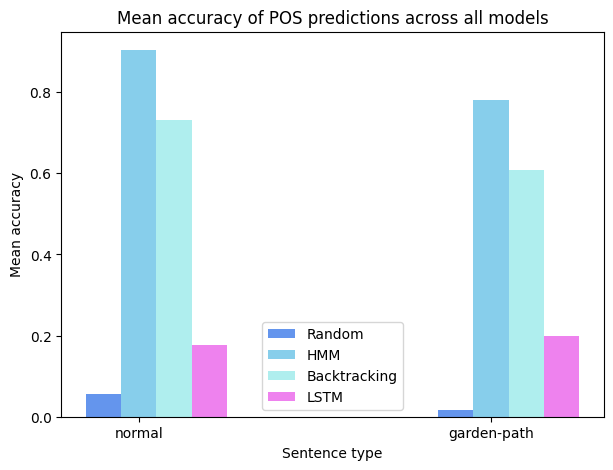

In [8]:
# Plot normal against garden path
fig = plt.figure(figsize=(7, 5))
labels = ['normal', 'garden-path']
X = np.arange(len(labels))
W = 0.1
plt.bar(X-0.1, random_means, width=W, label='Random', color='cornflowerblue')
plt.bar(X, hmm_means, width=W, label='HMM', color='skyblue')
plt.bar(X+0.1, btrk_means, width=W, label='Backtracking', color='paleturquoise')
plt.bar(X+0.2, lstm_means, width=W, label='LSTM', color='violet')
plt.legend()
plt.xticks(X, labels)
plt.xlabel("Sentence type")
plt.ylabel("Mean accuracy")
plt.title("Mean accuracy of POS predictions across all models")